# DATA PROFILLING

In [1]:
import pandas as pd
import numpy as np
import io
from pandas_profiling import ProfileReport
import sweetviz as sv
import matplotlib.pyplot as plt

retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

In [2]:
retail_raw.dtypes

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object

In [3]:
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product:',length_product_id)


Length kolom city: 5000
Length kolom product: 5000


In [4]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:',count_city)

# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id',count_product_id)

Count kolom count_city: 4984
Count kolom product_id 4989


In [5]:
# Missing value pada kolom city
number_of_missing_values_city = length_city-count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id-count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id* 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


In [6]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242863


In [7]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


In [8]:
#MISSING VALUES EACH KOLOM
for item in retail_raw.columns:
    jml = len(retail_raw[item])
    count = retail_raw[item].count()
    missing = jml-count
    print (item, ' ', missing)

order_id   0
order_date   0
customer_id   0
city   16
province   12
product_id   11
brand   0
quantity   14
item_price   13


In [9]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


In [3]:
data = ProfileReport(retail_raw, title ="Profile Report EDA DATASET DQLAB")

In [11]:
data.to_file("F:\DATASCIENCE\DQLAB\hasilprofilereport.html")
data.to_notebook_iframe()
data.to_widgets()

In [12]:
#Versi Minimal untuk Big Data, biar tidak berat
data = ProfileReport(retail_raw,minimal = True)
data

In [13]:
#Coba itung manual
counter = 0
for item in retail_raw['city']:
    if item == "Jakarta Selatan" :
        counter += 1
print(counter)

791


In [14]:
data = sv.analyze(retail_raw)
data.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



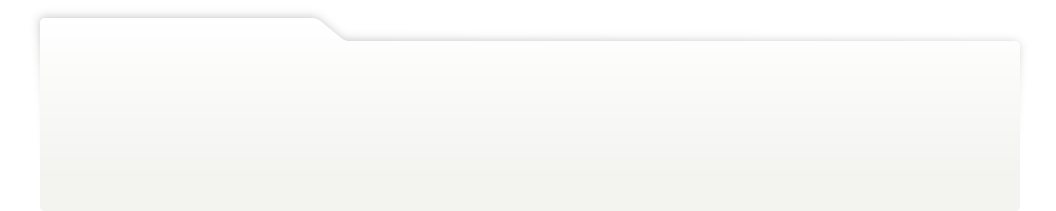
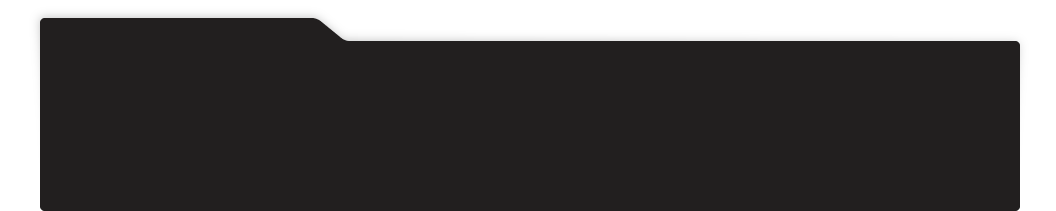
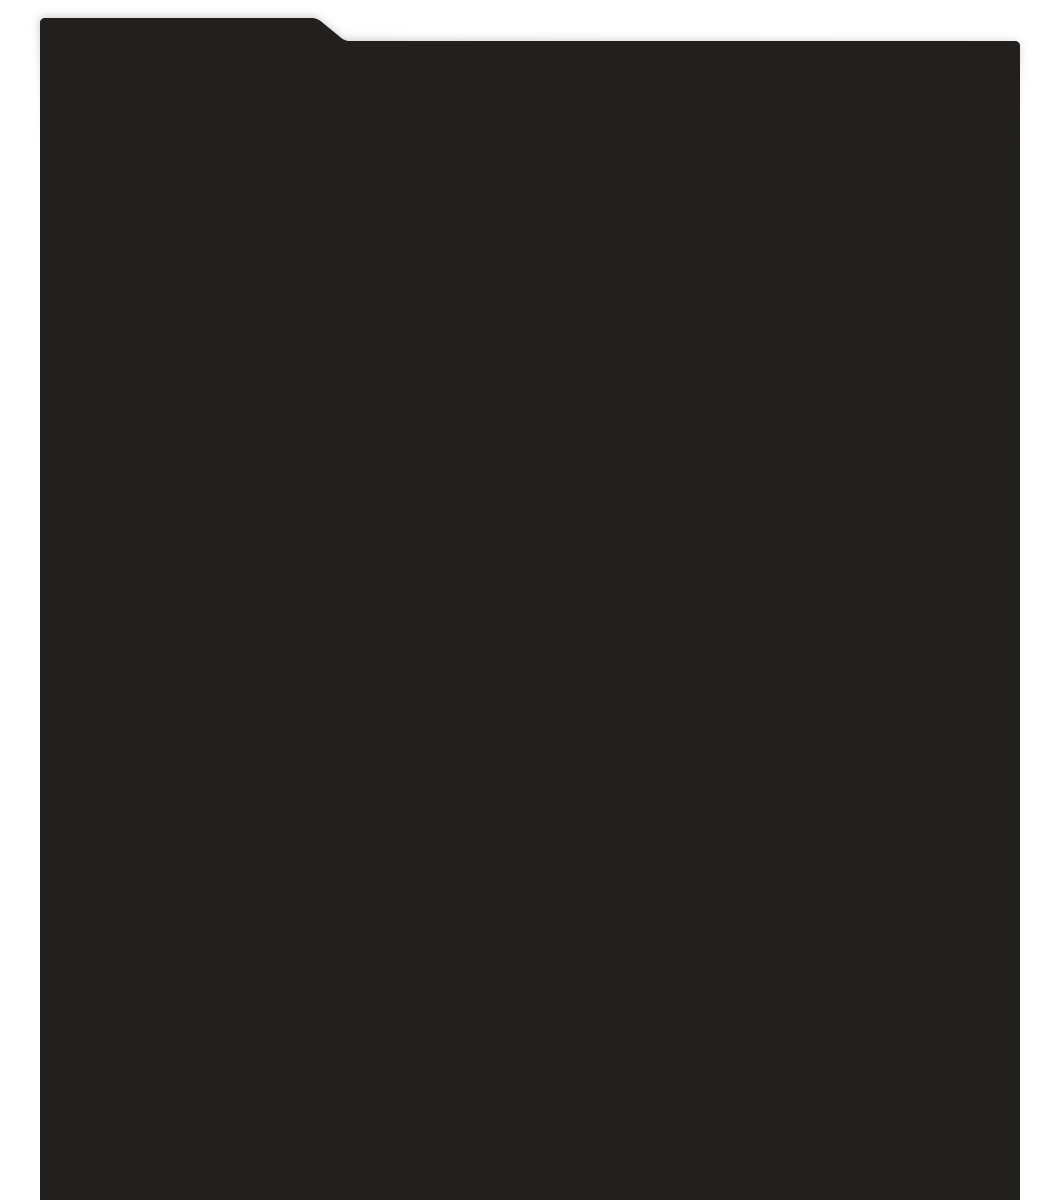
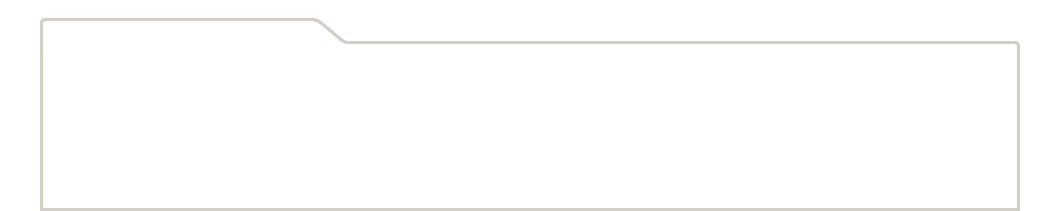
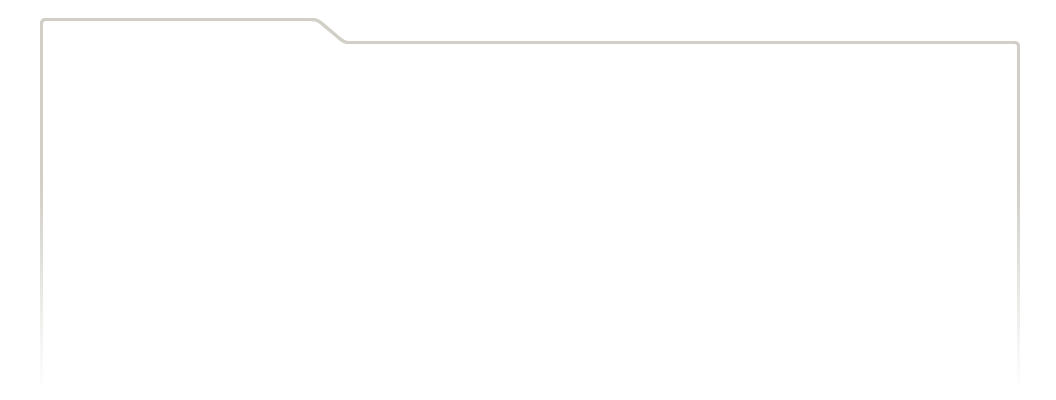
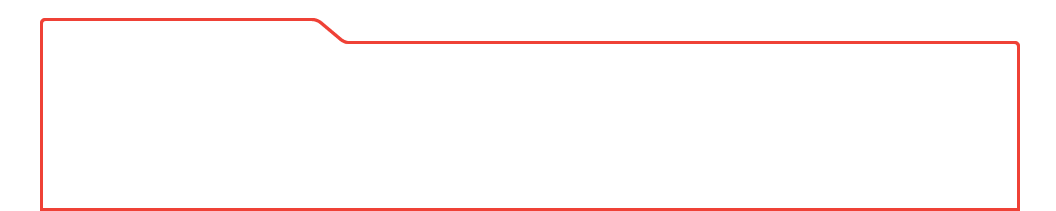
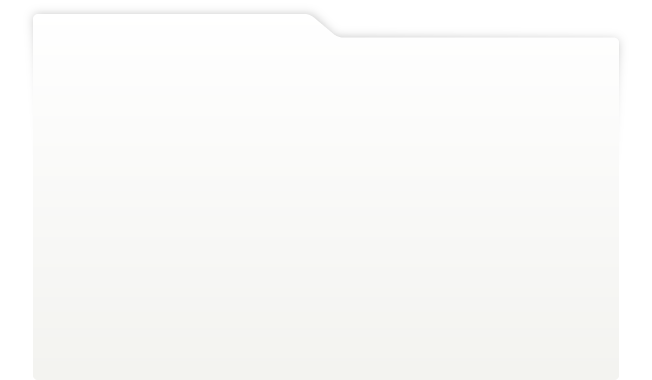
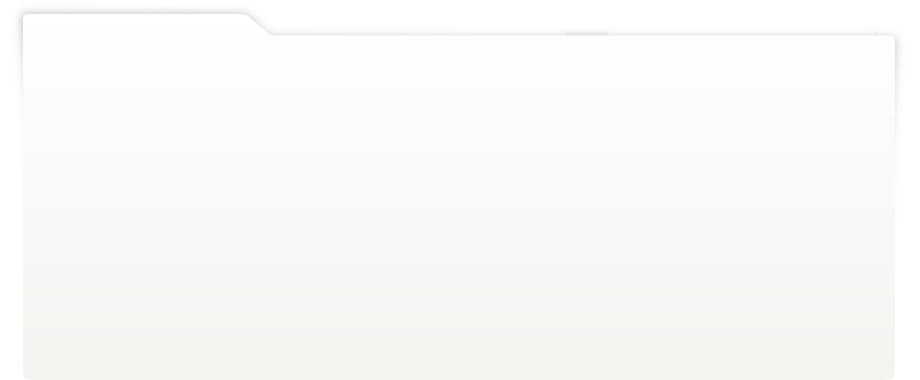
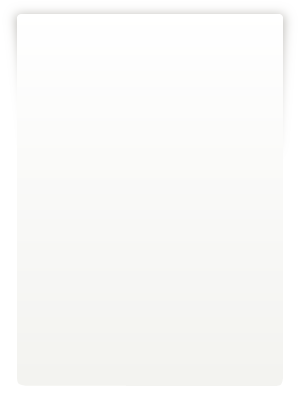
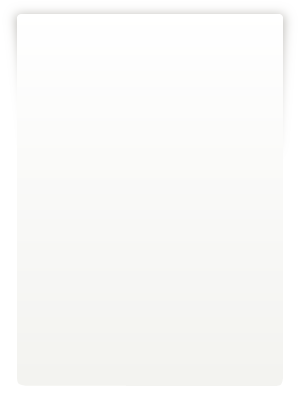
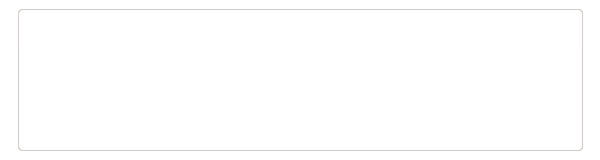
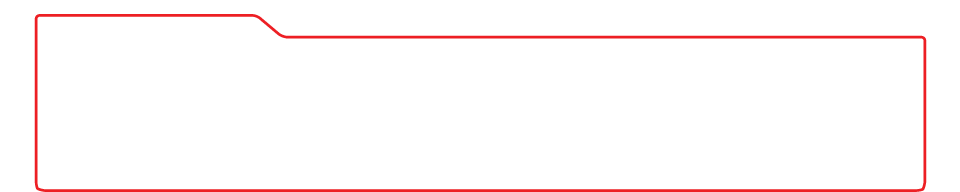
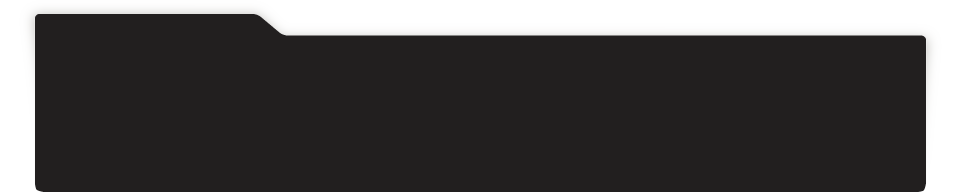
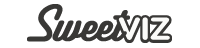
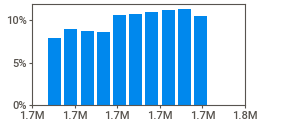
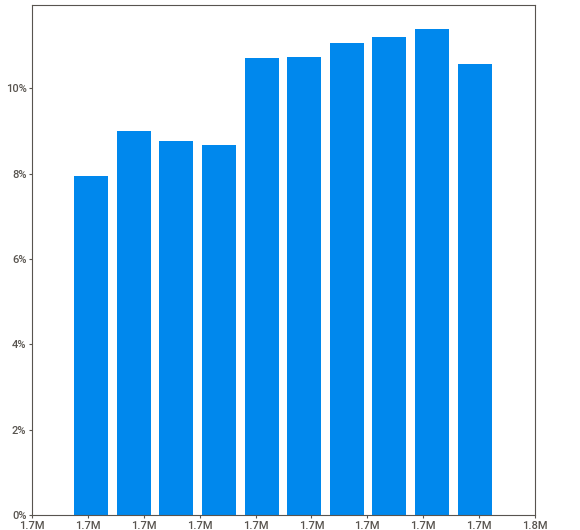
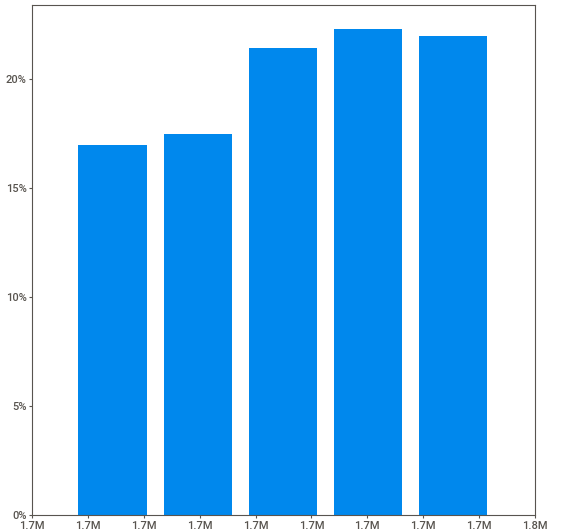
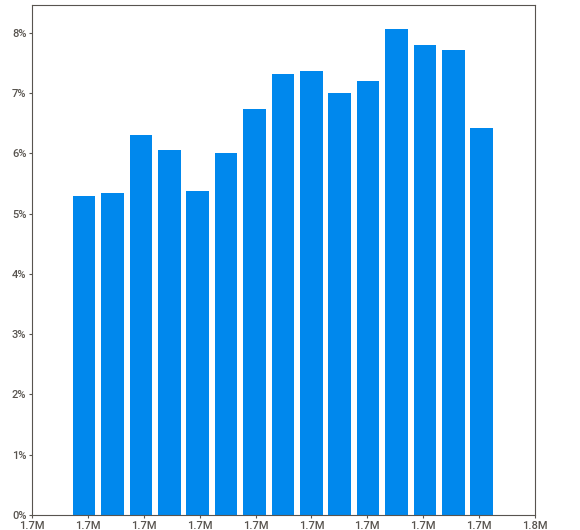
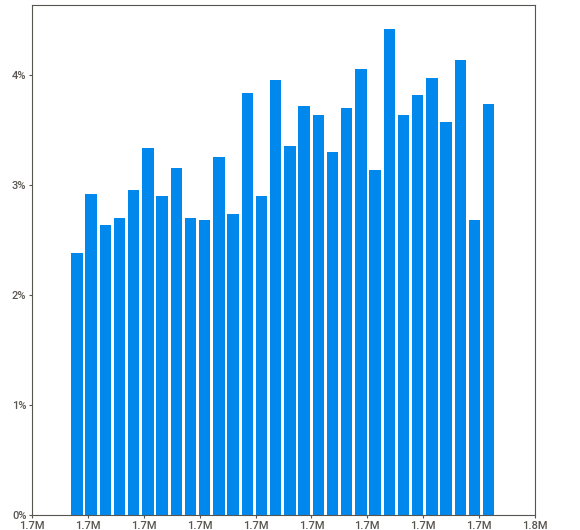
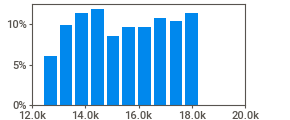
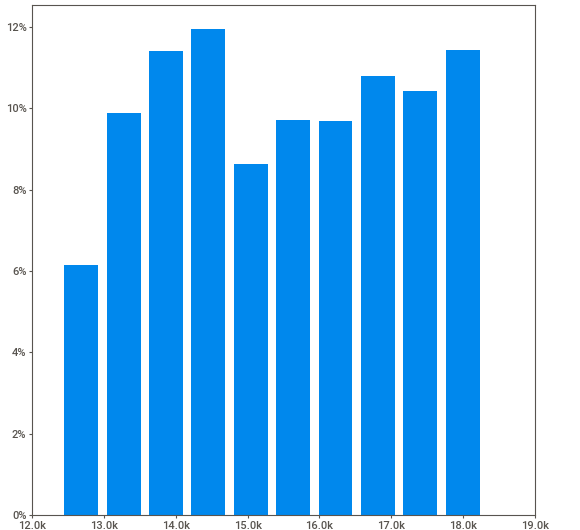
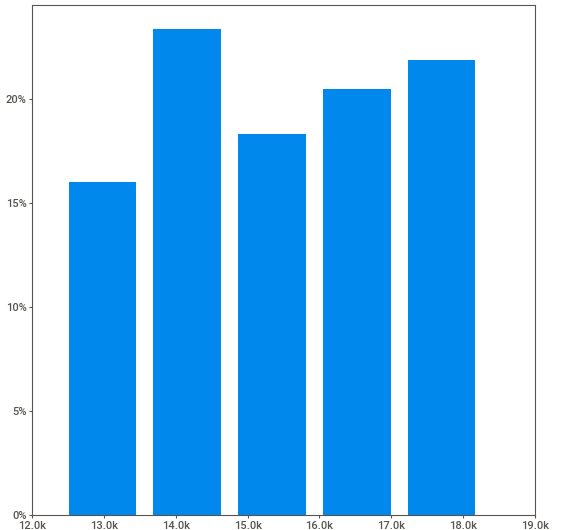
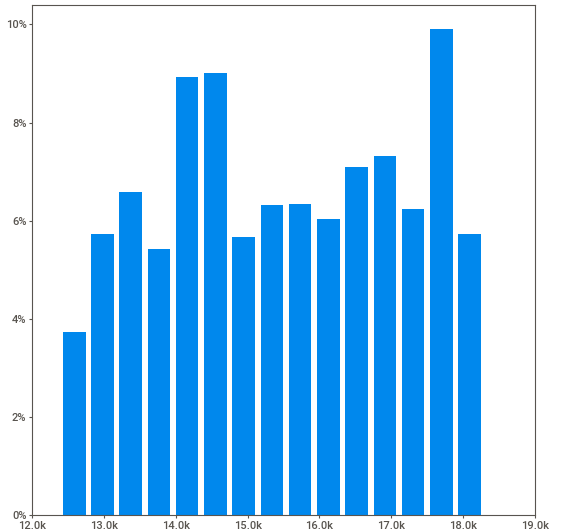
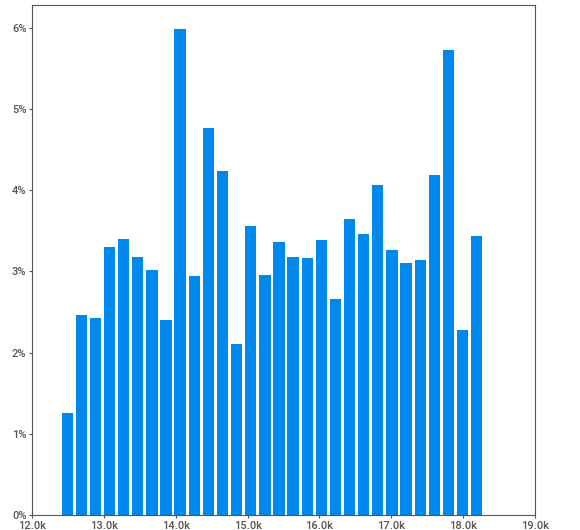
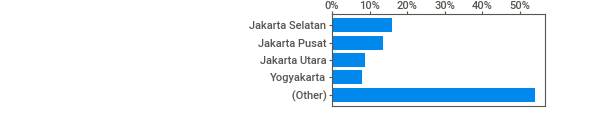
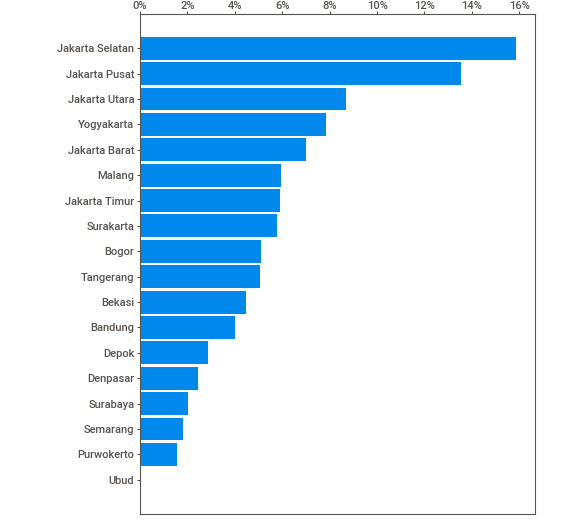
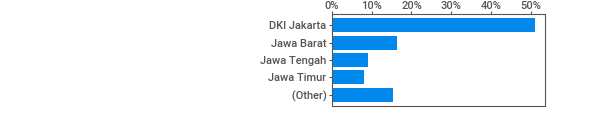
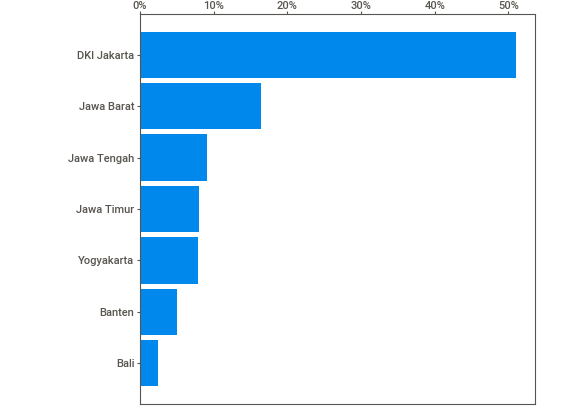
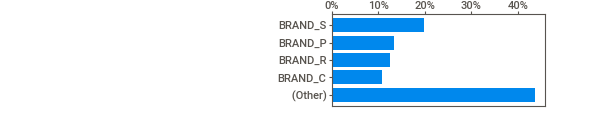
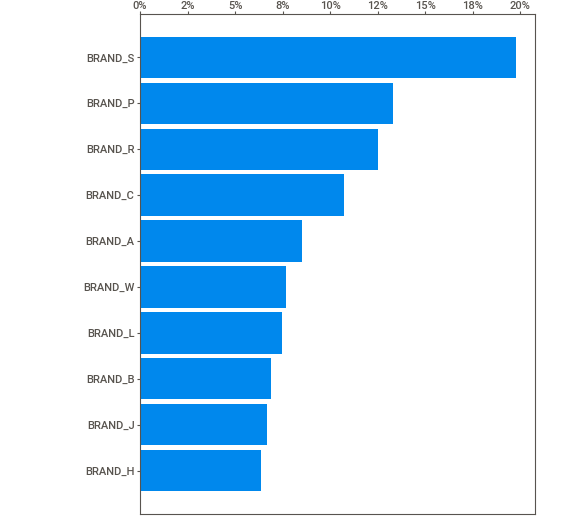
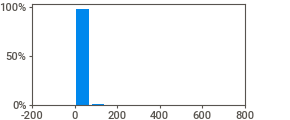
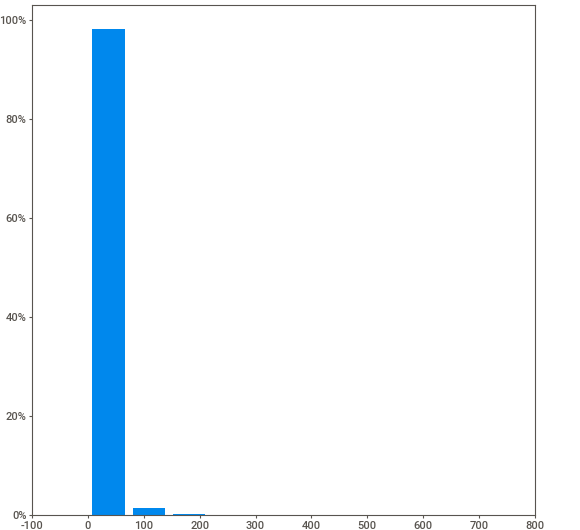
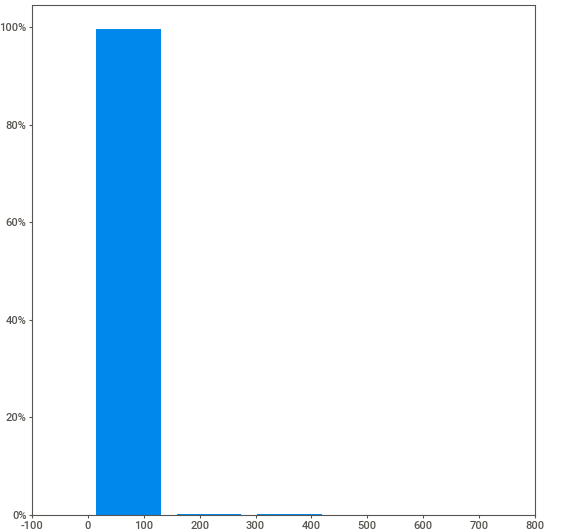
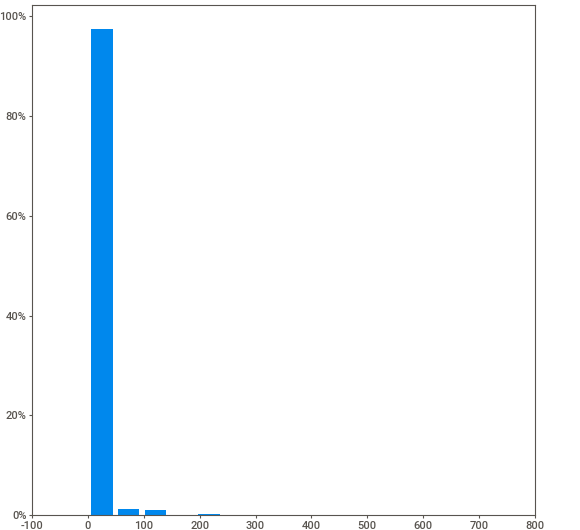
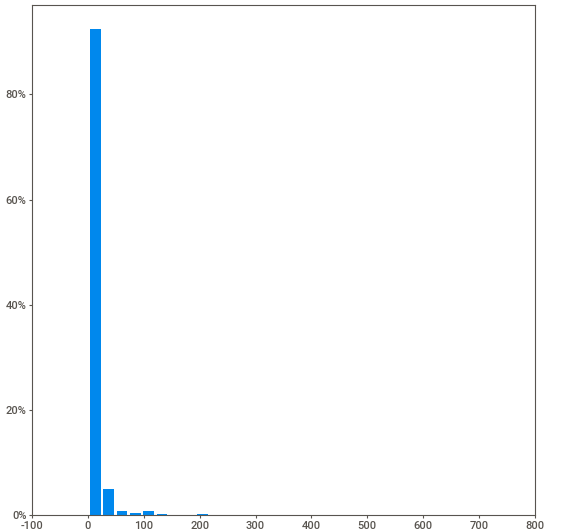
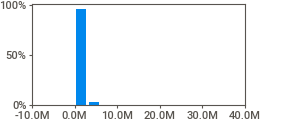
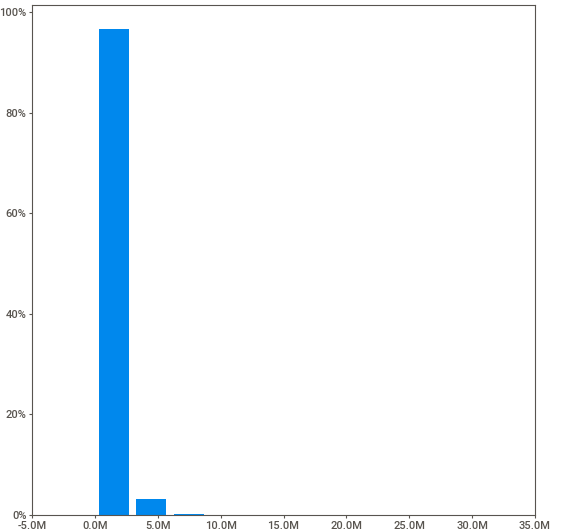
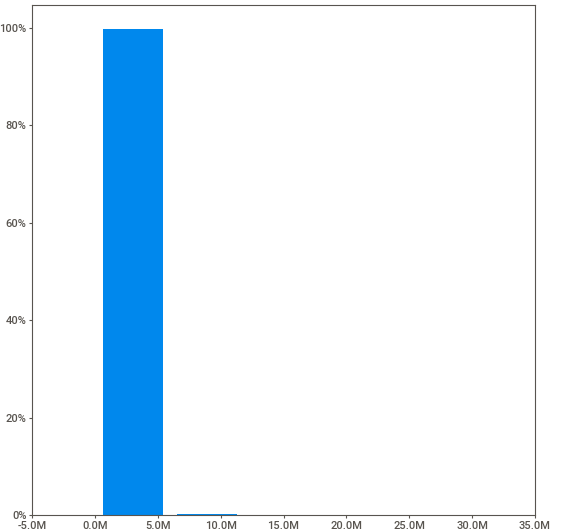
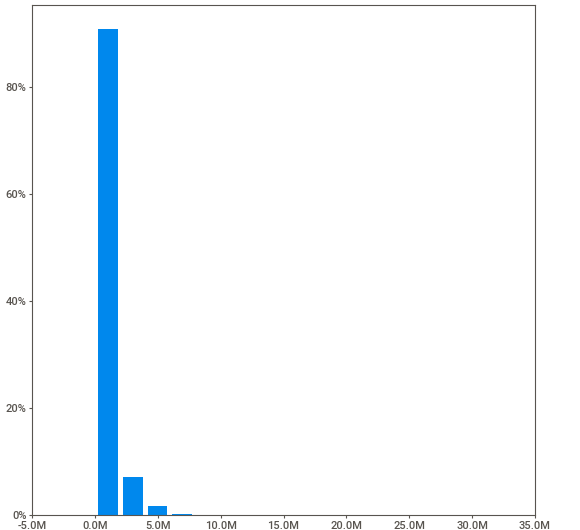
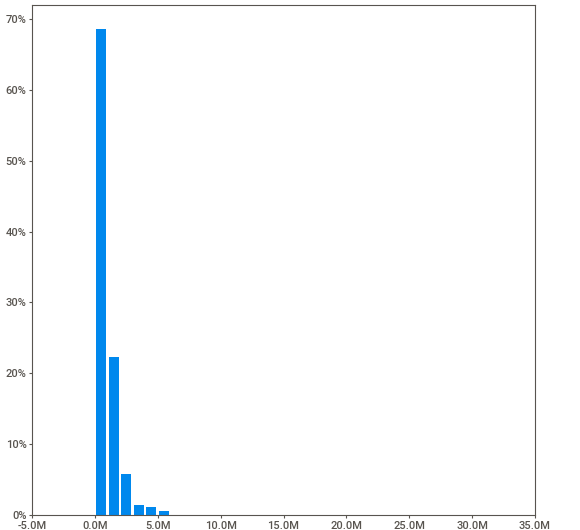
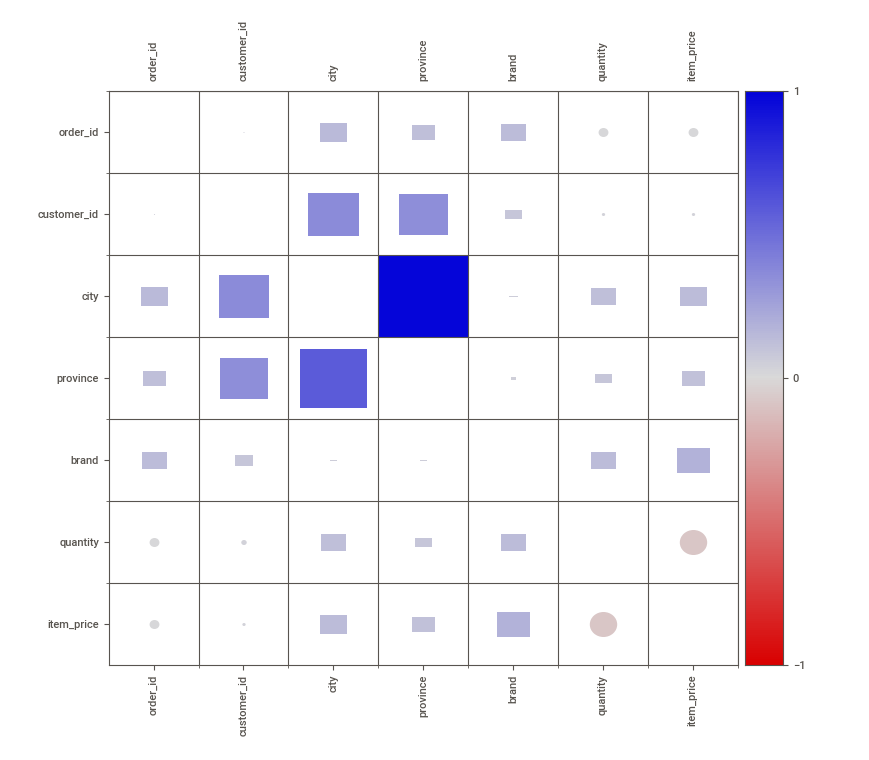
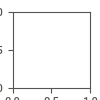

In [15]:
data.show_notebook()

Missing Data
Dataset yang ditemui di real-world biasanya akan memiliki banyak missing value. Kemampuan untuk treatment missing value sangat penting karena jika membiarkan missing value itu dapat memengaruhi analisis dan machine learning model. Sehingga jika menemukan nilai yang hilang dalam dataset, harus melakukan treatment sedemikian rupa. Cara check kolom yang mempunyai missing value:


namadataframe.isnull().any()
Cara treatment terhadap missing-value antara lain:

Leave as it is (dibiarkan)
Filling the missing value (imputasi)
Drop them (hapus row yang mengandung missing value)
 

Imputasi merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu. Bisa menggunakan mean, modus ataupun menggunakan predictive modelling. Pada modul ini akan membahas mengenai pemanfaatan function fillna dari Pandas untuk imputasi ini, yaitu



.function() yang dimaksud pada syntax di atas adalah penggunan fungsi .mean() atau .mode(). Penggunaan fungsi .mean() atau .mode() ini bergantung pada kondisi yang mengharuskan menggunakan nilai rata - rata atau modus dari kolom yang akan diimputasi, seperti

nama_dataframe['nama_kolom'].fillna(nama_dataframe.nama_kolom.mean())
atau

nama_dataframe['nama_kolom'].fillna(nama_dataframe.nama_kolom.mode())
 

Drop row yang mengandung missing value. Dapat menggunakan function dropna dari Pandas.



Untuk menangani missing data pada retail_raw, 

Ceklah jika terdapat missing value pada variabel dataframe, dan kemudian cetak ke console
Imputasi missing value pada kolom quantity dengan menggunaan nilai rataan (mean), dan kemudian cetak ke console
Drop-lah missing value pada kolom quantity, dan kemudian cetak ke console

In [16]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))
print(retail_raw['quantity'].count())

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())
print(retail_raw['quantity'].count())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64
4986

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64
4986


In [17]:
retail_raw['quantity_fill'] = retail_raw['quantity'].fillna(retail_raw.quantity.mean())
print(retail_raw['quantity_fill'].count())

5000


# OUTLIER REMOVE

In [18]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,'',Q3,'',IQR)

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1-1.5*IQR))|
                          (retail_raw['quantity'] > (Q3+1.5*IQR)))]
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)


2.0  12.0  10.0
Shape awal:  (5000, 10)
Shape akhir:  (4699, 10)


In [19]:
# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,'',Q3,'',IQR)

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1-1.5*IQR))|
                          (retail_raw['item_price'] > (Q3+1.5*IQR)))]
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

450000.0  1150000.0  700000.0
Shape awal:  (4699, 10)
Shape akhir:  (4379, 10)


In [20]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4379, 10)
Shape akhir:  (4373, 10)


In [21]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


# HANDLE MISSING VALUE

1. LEAVE AS IT IS
2. FILL DENGAN ANGKA /IMPUTASI
3. HAPUS / DROP

In [24]:
#Persentase missing value
length_qty = len (uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Persentase missing value kolom Quantity: 0.0%


In [23]:
uncleaned_raw.to_excel("F:\DATASCIENCE\DQLAB\export.xlsx",index=False)

# HANDLE OUTLIERS & DUPLICATE

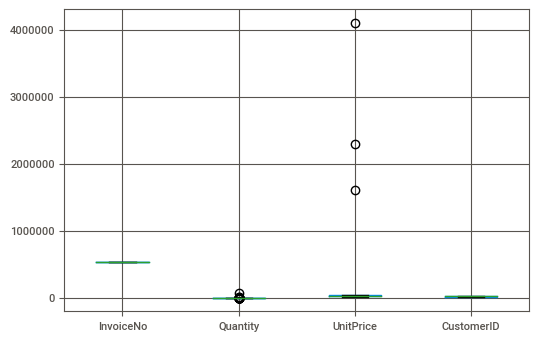

In [31]:
# Outliers dengan boxplot
uncleaned_raw.boxplot()
plt.show()

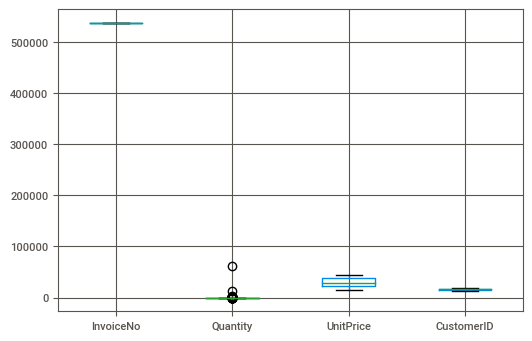

0      False
1      False
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Length: 496, dtype: bool


In [37]:
# Langkah selanjutnya bisa dilakukan dengan cara berikut:
# Melakukan proses removing outliers pada kolom UnitPrice.
# Checking duplikasi and melakukan deduplikasi dataset tersebut!

#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw['UnitPrice'] < (Q1-1.5*IQR)) |
                                (uncleaned_raw['UnitPrice'] > (Q3+1.5*IQR)))]

uncleaned_raw.boxplot()
plt.show()
#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()